<a href="https://colab.research.google.com/github/KhmAsif/IMSE441S2025/blob/main/Midterm_1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In Class Part**

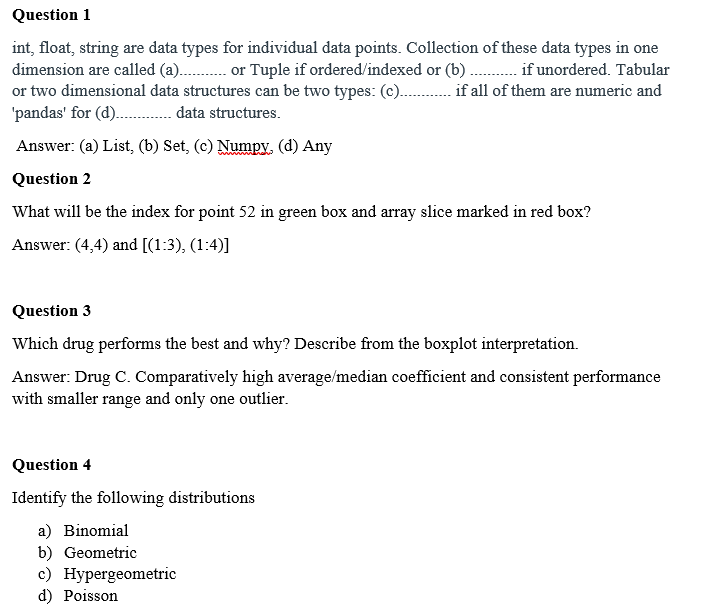

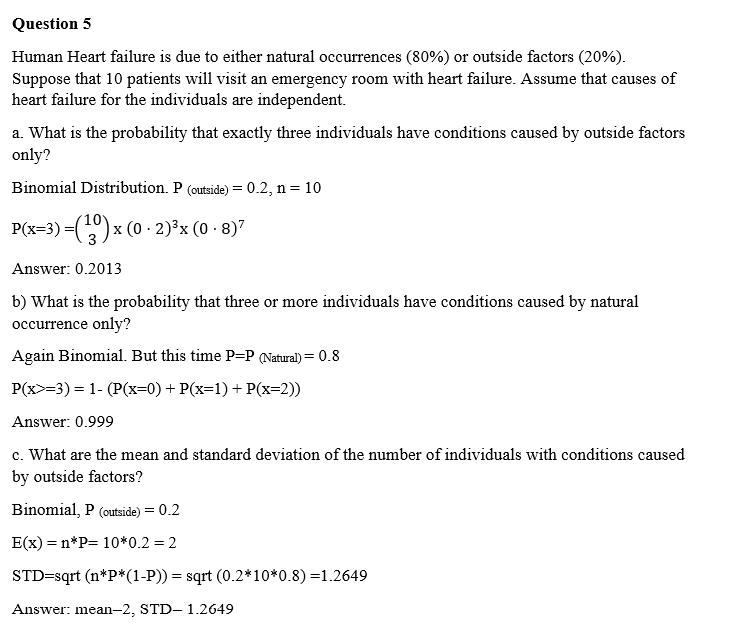

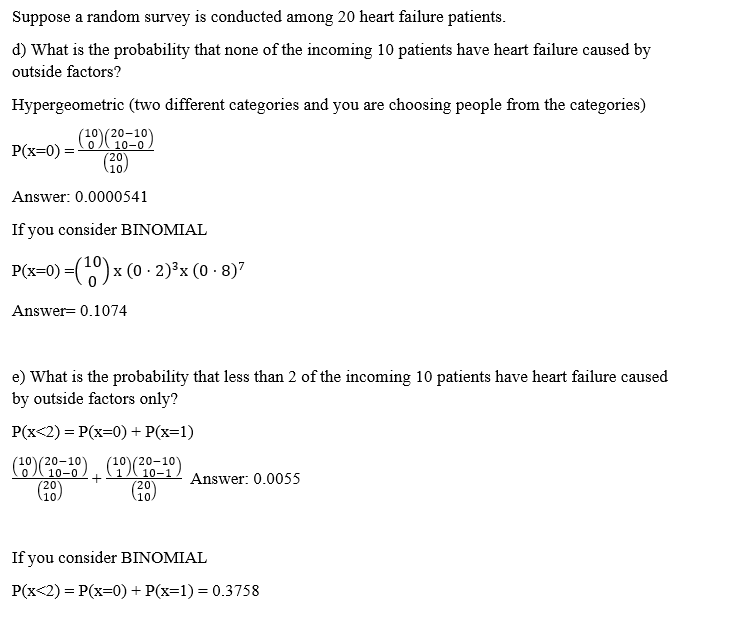

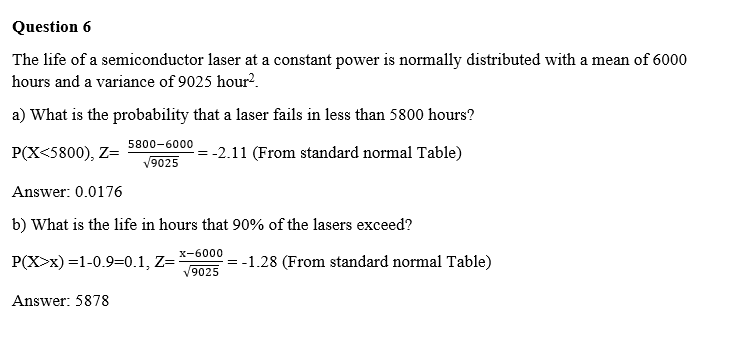

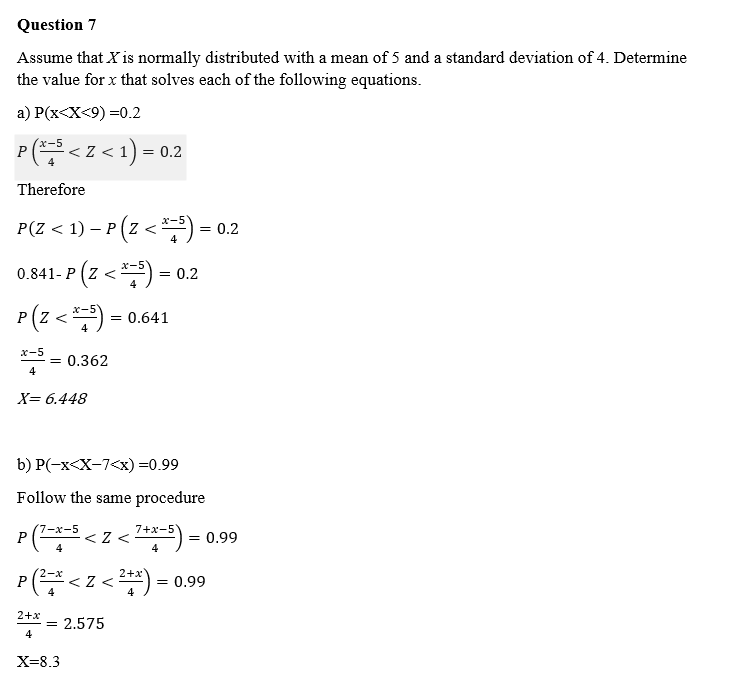

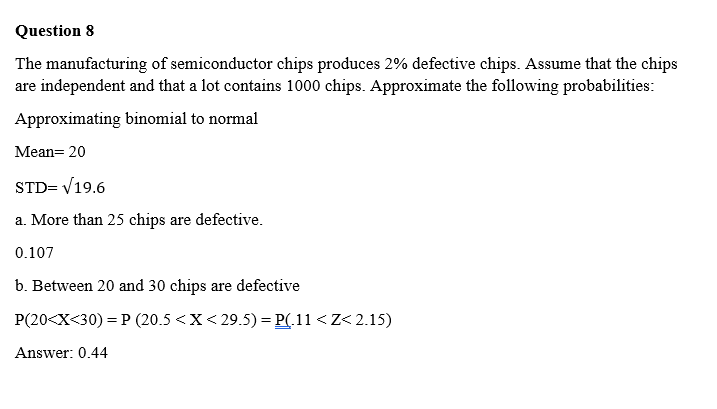

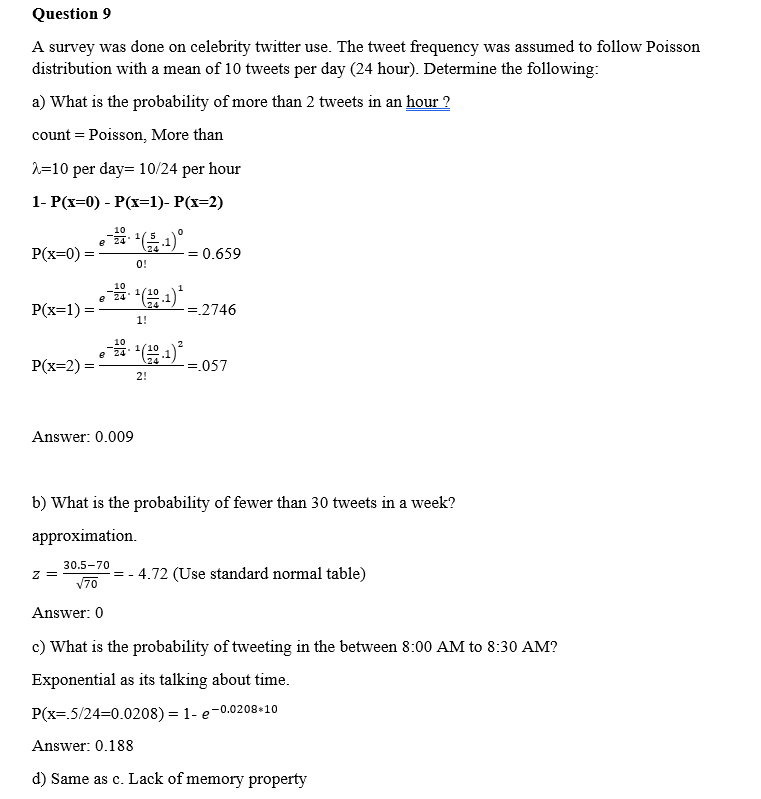

# **CODING PART**

**Question 1: (8 points)**

a) Import the data "Movie_data.csv" and perform descriptive statistics on numerical columns

b) Plot a histogram to show the variability in Runtime. Interprete the plot.

c) Construct boxplots to compare the IMDb(A Movie rating website) rating among different genres.Interprete the plots.

d) Plot a pie chart to show Rotten Tomatoes(A Movie rating website) mean rating variation among  different genres. Interprete the pie chart.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Movie=pd.read_csv("https://raw.githubusercontent.com/KhmAsif/IMSE441Spring24/main/Movie_data.csv")
Movie['Rotten_Tomatoes']=Movie['Rotten_Tomatoes'].str.rstrip('%')
Movie['Rotten_Tomatoes']=Movie['Rotten_Tomatoes'].astype(float)

In [ ]:
#a)
Movie.describe()

,Year,IMDb,Rotten_Tomatoes,Runtime
count,31.000000,31.000000,31.000000,31.000000
mean,2018.387097,6.303226,70.677419,102.387097
std,0.495138,1.125310,25.614302,16.810071
min,2018.000000,3.500000,17.000000,67.000000
25%,2018.000000,5.750000,49.500000,90.000000
50%,2018.000000,6.500000,79.000000,101.000000
75%,2019.000000,7.150000,92.500000,111.500000
max,2019.000000,8.200000,100.000000,147.000000


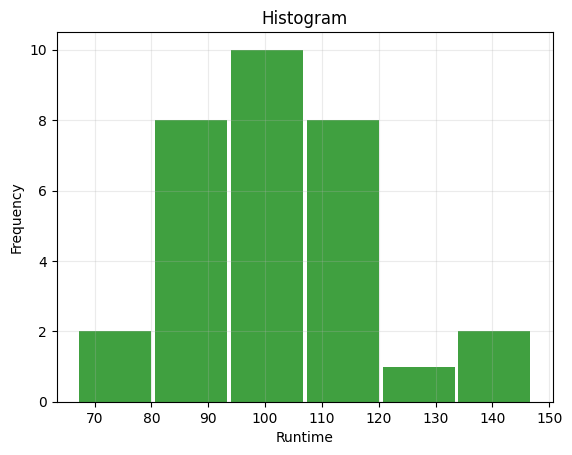

In [ ]:
#b). (31 data points so use 5 or 6 bins)
plt.hist(Movie['Runtime'], bins=6, rwidth=0.95, color='green', alpha=0.75)
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(alpha=0.25)
plt.show()

Runtime data has normal distrbution with a mean around 100 minutes. Mean runtime has the highest frequency(10)

In [ ]:
Comedy = Movie[Movie['Genres'] == 'Comedy']
Adventure = Movie[Movie['Genres'] == 'Adventure']
Drama = Movie[Movie['Genres'] == 'Drama']
Thriller = Movie[Movie['Genres'] == 'Thriller']
Mystery = Movie[Movie['Genres'] == 'Mystery']

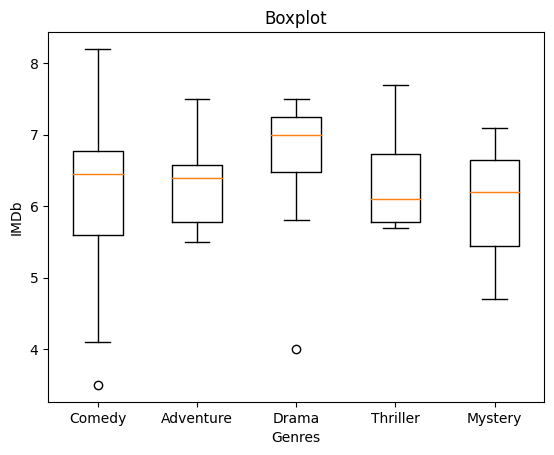

In [ ]:
plt.boxplot([Comedy['IMDb'], Adventure['IMDb'], Drama['IMDb'], Thriller['IMDb'], Mystery["IMDb"]], labels=['Comedy', 'Adventure', 'Drama', 'Thriller', 'Mystery'])
plt.xlabel('Genres')
plt.ylabel('IMDb')
#plt.xlim(0,3)
#plt.ylim(4,15)
plt.title('Boxplot')
plt.show()

Drama is rated higher on average than the rest, with a median rating of about 7 compared to other genres which are between 6-6.5. Drama genres also have the least amount of variability in their ratings except for the one outlier. Comedy has the most variability in the ratings. Comedy also has the highest and lowest overall ratings.

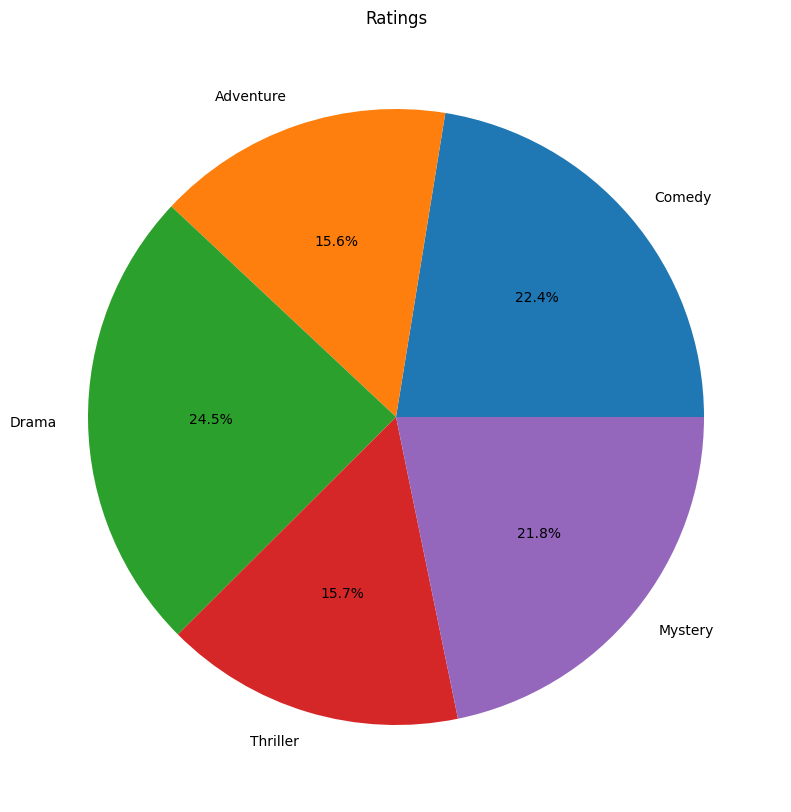

In [ ]:
#d).
type_1=['Comedy', 'Adventure', 'Drama', 'Thriller', 'Mystery']
profit=[Comedy['Rotten_Tomatoes'].mean(), Adventure['Rotten_Tomatoes'].mean(), Drama['Rotten_Tomatoes'].mean(), Thriller['Rotten_Tomatoes'].mean(), Mystery['Rotten_Tomatoes'].mean()]
plt.figure(figsize=(10,10))
plt.pie(profit,labels= type_1, autopct='%.1f%%')
plt.title('Ratings')
plt.show()

Drama movies have the highest variation percentage and Adventure gnre movies have the lowest rating variation percentage

**Question 2 (12 points)**

a) Suppose adventure movies have 75% chance of getting 8 or higher IMDb rating (Being a hit). If a production house choose to make 10 movies what is the probability that 5 of them will be a hit?

b) Suppose a group of five friends are deciding on what movie to watch on a weekend. Consider for this question that they only have adventure and comedy movies form the data table. If each of them pick one movie independently, what is the probability that 3 of them will choose adventure movies.

c) Suppose the runtime of movies follow a poisson distribution. The mean runtime is 110 minutes. What is the probability that a movie will have runtime of 1 hour 30 minutes.

In [ ]:
from scipy.stats import binom
from scipy.stats import hypergeom
from scipy.stats import expon

In [ ]:
#a.)
binom.pmf(5, 10, .75)

0.058399200439453146

In [ ]:
#b).
#Total number of Adventure + Comedy movies = 6 adventure + 10 comedy = 16 total
hypergeom.pmf(k=3, M=16, n=6, N=5)

0.206043956043956

In [ ]:
#c
expon.pdf(90,scale=110)

0.004011210615999854

**Question 3: (12 Points)**

A laptop company claims up to 9 hours of wireless web usage for its newest laptop battery life. However, reviews on this laptop shows many complaints about low battery life. A survey on battery life reported by customers shows that it follows a normal distribution with mean 7.5 hours and standard deviation 30 minutes.

a) Plot the probability distribution with suitable range

b) What is the probability that the battery life is at least 8.5 hours?

c) What is the probability that the battery life is less than 6 hours?

d) What is the time of use that is exceeded with probability 0.85?




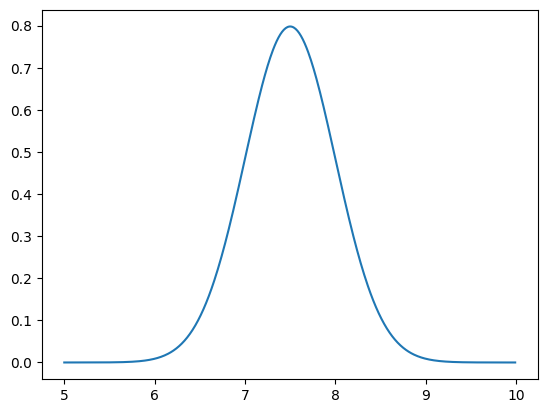

In [ ]:
#a).
from scipy.stats import norm

x=np.arange(5,10,0.01)
plt.plot(x,norm.pdf(x,7.5,0.5))
plt.show()

In [ ]:
#b).
norm.sf(8.5, 7.5, 0.5)

0.022750131948179195

In [ ]:
#c).
norm.cdf(6,7.5,0.5)

0.0013498980316300933

In [ ]:
#d).
norm.ppf(.15,7.5,0.5)

6.981783305253105

**Question 4: (8 Points)**

Suppose you are surveying the performance of promotional advertisement for a product which follows an exponential distribution. The average number of minutes between apperances on a certain TV channel is 21 minutes.

a) What is the probability that you'll have to wait less than 10 minutes for an appearance?

b) What is the probability of getting at least 5 appearance in next 2 hours?

In [ ]:
#a).
expon.cdf(10, scale = 21)

0.3788548423845485

In [ ]:
#b)
from scipy.stats import poisson
poisson.sf(4, mu=1/21*120)

0.6748830984306834